In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from morphogenesis.dataset import *
import matplotlib.pyplot as plt
from torchvision.transforms import Compose

transform = Compose([
    Reshape2DField(),
])

vel = AtlasDataset('WT', 'Runt', 'velocity2D', transform=Reshape2DField())
rnt = AtlasDataset('WT', 'Runt', 'raw2D', transform=transform)
eve = AtlasDataset('WT', 'Even_Skipped-YFP', 'raw2D', transform=transform, drop_time=True)
ftz = AtlasDataset('WT', 'Fushi_Tarazu', 'raw2D', transform=transform)
slp = AtlasDataset('WT', 'Sloppy_Paired', 'raw2D', transform=transform)
prd = AtlasDataset('WT', 'Paired', 'raw2D', transform=transform)


dataset = JointDataset([
    ('rnt', rnt),
    ('eve', eve),
    ('ftz', ftz),
    ('slp', slp),
    ('prd', prd),
    ('vel', vel),
], live_key='vel', ensemble=1)
dataset.df

100%|██████████| 18/18 [00:00<00:00, 10786.89it/s]


,folder,tiff,embryoID,time,eIdx,key,dataset_idx,merged_index
0,/Users/jcolen/Documents/drosophila_morphogenes...,MAX_Cyl1_2_000000_c1_rot_scaled_view1.tif,202001150004,-15.000000,4,rnt,0,-1
1,/Users/jcolen/Documents/drosophila_morphogenes...,MAX_Cyl1_2_000000_c1_rot_scaled_view1.tif,202001150004,-14.000000,5,rnt,0,-1
2,/Users/jcolen/Documents/drosophila_morphogenes...,MAX_Cyl1_2_000000_c1_rot_scaled_view1.tif,202001150004,-13.000000,6,rnt,0,-1
3,/Users/jcolen/Documents/drosophila_morphogenes...,MAX_Cyl1_2_000000_c1_rot_scaled_view1.tif,202001150004,-12.000000,7,rnt,0,-1
4,/Users/jcolen/Documents/drosophila_morphogenes...,MAX_Cyl1_2_000000_c1_rot_scaled_view1.tif,202001150004,-11.000000,8,rnt,0,-1
...,...,...,...,...,...,...,...,...
523,/Users/jcolen/Documents/drosophila_morphogenes...,MAX_Cyl1_2_000000_c1_rot_scaled_view1.tif,202001141943,18.649177,4,vel,5,47
524,/Users/jcolen/Documents/drosophila_morphogenes...,MAX_Cyl1_2_000000_c1_rot_scaled_view1.tif,202001141943,20.109960,5,vel,5,48
525,/Users/jcolen/Documents/drosophila_morphogenes...,MAX_Cyl1_2_000000_c1_rot_scaled_view1.tif,202001141943,21.886726,6,vel,5,49
526,/Users/jcolen/Documents/drosophila_morphogenes...,MAX_Cyl1_2_000000_c1_rot_scaled_view1.tif,202001141943,24.259138,7,vel,5,50


In [3]:
dataset.values.keys()

dict_keys([202001150004, 202001142033, 202001141730, 202001210044, 202001210000, 202001141943, 202001201216, 202001201716, 201905091640, 201905071651, 201905091557, 201905091402, 201905101422, 201905091543, 201905091719, 201905101440, 201905091604, 201905091624, 201905091714, 201905071659, 201905091409, 201905091633, 201905071718, 201905091648, 201905101432, 201905091724, 201905291233, 201905291103, 201905291217, 201905291146, 201905291527, 201905291456, 201905291411, 201905291419, 201905291402, 201905291438, 201905291138, 201905291448, 201905291518, 201905291227, 201905291533])

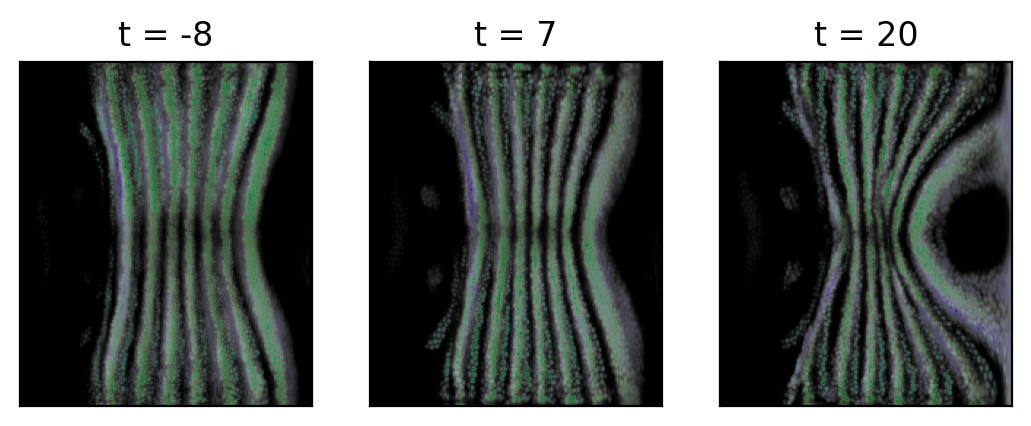

In [4]:
from utils.plot_utils import *
fig, ax = plt.subplots(1, 3, dpi=200)

colors = {
    'rnt': 'Purples',
    #'eve': 'Oranges',
    #'trt': 'Reds',
    'ftz': 'Greens',
    #'slp': 'Blues',
    'prd': 'BuGn',
}
for i, idx in enumerate([5, 20, 30]):
    batch = dataset[idx]
    for key in colors:
        field = batch[key][0] - np.median(batch[key][0])
        field[field < 0] = 0
        field /= np.ptp(field)
        ax[i].imshow(field, cmap=colors[key], alpha=field, extent=[ap_min, ap_max, dv_min, dv_max])
    ax[i].set_facecolor('black')
    ax[i].set(xticks=[], yticks=[])
    ax[i].set(xlim=[ap_min, ap_max], ylim=[dv_min, dv_max])
    ax[i].set(aspect='equal')
    ax[i].set_title('t = %d' % batch['time'])
    

In [7]:
%load_ext autoreload
%autoreload 2

from morphogenesis.dataset import *
import matplotlib.pyplot as plt
from torchvision.transforms import Compose

transform = Compose([
    Reshape2DField(),
    ToTensor(),
])

vel = AtlasDataset('WT', 'Runt', 'velocity2D', transform=transform, tmin=-10, tmax=40)
rnt = AtlasDataset('WT', 'Runt', 'raw2D', transform=transform, tmin=-10, tmax=40)
print(rnt.df.loc[rnt.df.embryoID == 202001210044, 'time'].values)
print(rnt.df.loc[vel.df.embryoID == 202001210044, 'time'].values)

dataset = TrajectoryDataset([
    ('rnt', rnt),
    ('vel', vel),
], live_key='vel')

loader = torch.utils.data.DataLoader(dataset, num_workers=2)
from tqdm import tqdm
for batch in tqdm(loader):
    pass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


100%|██████████| 6/6 [00:00<00:00, 6000.43it/s]


[-6.97598863 -5.98184142 -5.12009921 -4.17383763 -3.24406093 -2.32365025
 -1.40436704 -0.50285658  0.40967095  1.29308019  2.18897606  3.08051842
  3.99624993  4.9288938   5.91336789  6.97892234  8.15063068  9.46746694
 10.9292666  12.46870406 14.05105978 15.48244885 16.76066569 17.90306537
 18.94254957 19.89324707 20.7997394  21.72140055 22.57320456 23.49713311
 24.79276559 25.35315831 26.19706056 27.08038473 27.98229783 28.87278061
 29.70505592 30.45929449 31.26473627 31.96409464 32.72579254 33.39169607
 34.15360158 34.81798897 35.55553675 36.28139792 37.05166798 37.87484034
 38.73754045 39.62194069]
[-6.97598863 -5.98184142 -5.12009921 -4.17383763 -3.24406093 -2.32365025
 -1.40436704 -0.50285658  0.40967095  1.29308019  2.18897606  3.08051842
  3.99624993  4.9288938   5.91336789  6.97892234  8.15063068  9.46746694
 10.9292666  12.46870406 14.05105978 15.48244885 16.76066569 17.90306537
 18.94254957 19.89324707 20.7997394  21.72140055 22.57320456 23.49713311
 24.79276559 25.35315831 

 90%|█████████ | 196/217 [00:02<00:00, 169.07it/s]

In [19]:
dataset.df[dataset.df.embryoID == 202001210044].drop(['folder', 'tiff'], axis=1).tail(50)

,embryoID,time,eIdx,key,dataset_idx,merged_index,max_len,sequence_index
328,202001210044,-7,0,vel,1,171,49,161
329,202001210044,-6,1,vel,1,172,48,162
330,202001210044,-5,2,vel,1,173,47,163
331,202001210044,-4,3,vel,1,174,46,164
332,202001210044,-3,4,vel,1,175,45,165
333,202001210044,-2,5,vel,1,176,44,166
334,202001210044,-1,6,vel,1,177,43,167
335,202001210044,-1,7,vel,1,177,42,167
336,202001210044,0,8,vel,1,178,41,168
337,202001210044,1,9,vel,1,179,40,169


In [9]:
dataset.values[202001210044]['vel'].shape, dataset.values[202001210044]['rnt'].shape

((88, 2, 236, 200), (88, 236, 200))